In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import verde as vd
import pyproj
import pygmt
import eqs_magnetics as eqs
import harmonica as hm

## Load ICEGRAV

In [ ]:
icegrav = pd.read_table(
    '../data/ICEGRAV_Mag_2013_v2.XYZ',
    delim_whitespace=True,
    na_values="*",
    dtype={'Line_Number':str}
)
icegrav.dropna(subset=('Lon', 'Lat'), inplace=True)

In [17]:
projection = pyproj.Proj(projparams='+proj=ups +south', preserve_units=False)
x,y = projection(icegrav.Lon, icegrav.Lat)
coordinates = [x, y]
coordinates.append(np.full_like(coordinates[0], icegrav.Height_WGS1984))

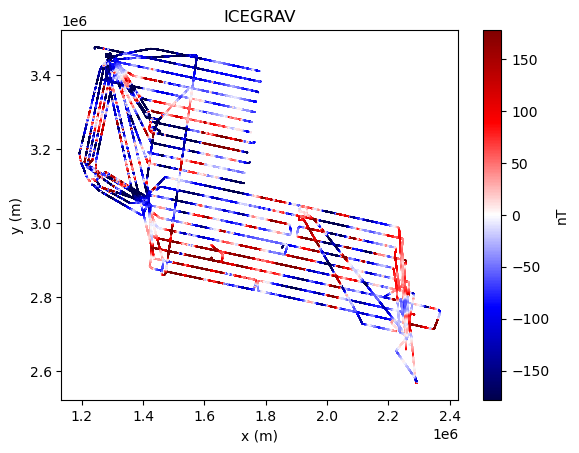

In [18]:
plt.figure()
scale = np.nanpercentile(icegrav.MagL, 95)
plt.scatter(*coordinates[:2], c=icegrav.MagL, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.colorbar(label="nT")
plt.title("ICEGRAV")
plt.show()

In [2]:
field_direction = np.array([hm.magnetic_angles_to_vec(1, -65, 25)]).T

In [81]:
source_coordinates = []
dipole_moments = []

# SOURCE 1
# Grid
source_coordinates.append([np.asarray(c).ravel() for c in vd.grid_coordinates([1.28e6,1.32e6,3.38e6,3.40e6,], shape=(20,20), extra_coords=-1e3)])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(400,3e9), -60, 60)))
# North
source_coordinates.append(vd.profile_coordinates((1.284e6,3.401e6),(1.316e6,3.401e6), size=14, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(14,3e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.290e6,3.402e6),(1.310e6,3.402e6), size=12, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(12,3e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.296e6,3.403e6),(1.304e6,3.403e6), size=5, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(5,3e9), -60, 60)))
# East
source_coordinates.append(vd.profile_coordinates((1.278e6,3.382e6),(1.278e6,3.398e6), size=14, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(14,3e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.276e6,3.385e6),(1.276e6,3.395e6), size=10, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(10,3e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.274e6,3.387e6),(1.274e6,3.393e6), size=6, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(6,3e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.272e6,3.389e6),(1.272e6,3.391e6), size=2, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(2,3e9), -60, 60)))
# South
source_coordinates.append(vd.profile_coordinates((1.284e6,3.379e6),(1.316e6,3.379e6), size=14, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(14,3e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.290e6,3.378e6),(1.310e6,3.378e6), size=12, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(12,3e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.296e6,3.377e6),(1.304e6,3.377e6), size=5, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(5,3e9), -60, 60)))
# East
source_coordinates.append(vd.profile_coordinates((1.322e6,3.382e6),(1.322e6,3.398e6), size=14, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(14,3e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.324e6,3.385e6),(1.324e6,3.395e6), size=10, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(10,3e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.326e6,3.387e6),(1.326e6,3.393e6), size=6, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(6,3e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.328e6,3.389e6),(1.328e6,3.391e6), size=2, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(2,3e9), -60, 60)))

# SOURCE 2
# Top
source_coordinates.append(vd.profile_coordinates((1.24e6,3.26e6),(1.26e6,3.28e6), size=20, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.24e6,3.258e6),(1.262e6,3.28e6), size=20, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,3e9), 0, 60)))
source_coordinates.append(vd.profile_coordinates((1.24e6,3.256e6),(1.264e6,3.28e6), size=30, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(30,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.24e6,3.254e6),(1.266e6,3.28e6), size=30, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(30,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.24e6,3.252e6),(1.268e6,3.28e6), size=30, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(30,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.24e6,3.25e6),(1.27e6,3.28e6), size=30, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(30,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.24e6,3.248e6),(1.27e6,3.278e6), size=30, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(30,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.24e6,3.246e6),(1.27e6,3.276e6), size=30, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(30,3e9), 60, 60)))
# Middle
source_coordinates.append(vd.profile_coordinates((1.226e6,3.23e6),(1.27e6,3.274e6), size=40, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(40,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.226e6,3.228e6),(1.27e6,3.272e6), size=40, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(40,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.226e6,3.226e6),(1.27e6,3.27e6), size=40, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(40,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.226e6,3.224e6),(1.27e6,3.268e6), size=40, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(40,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.226e6,3.222e6),(1.27e6,3.266e6), size=40, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(40,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.226e6,3.22e6),(1.27e6,3.264e6), size=40, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(40,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.226e6,3.218e6),(1.27e6,3.262e6), size=40, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(40,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.227e6,3.216e6),(1.27e6,3.26e6), size=40, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(40,3e9), 60, 60)))
# Bottom
source_coordinates.append(vd.profile_coordinates((1.228e6,3.216e6),(1.246e6,3.234e6), size=15, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(15,3e9), -30, 60)))
source_coordinates.append(vd.profile_coordinates((1.23e6,3.216e6),(1.246e6,3.232e6), size=15, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(15,3e9), -30, 60)))
source_coordinates.append(vd.profile_coordinates((1.232e6,3.216e6),(1.246e6,3.23e6), size=5, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(5,3e9), -30, 60)))
source_coordinates.append(vd.profile_coordinates((1.234e6,3.216e6),(1.246e6,3.228e6), size=5, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(5,3e9), -30, 60)))

# SOURCE 3
source_coordinates.append(vd.profile_coordinates((1.672e6,3.190e6),(1.683e6,3.1925e6), size=10, extra_coords=-500)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(10,4e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.67e6,3.1885e6),(1.69e6,3.193e6), size=10, extra_coords=-500)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(10,4e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.668e6,3.187e6),(1.694e6,3.193e6), size=15, extra_coords=-500)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(15,4e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.666e6,3.1855e6),(1.70e6,3.1935e6), size=20, extra_coords=-500)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,4e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.662e6,3.1835e6),(1.706e6,3.194e6), size=20, extra_coords=-500)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,4e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.66e6,3.182e6),(1.71e6,3.194e6), size=20, extra_coords=-500)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,4e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.66e6,3.181e6),(1.714e6,3.194e6), size=20, extra_coords=-500)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,4e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.66e6,3.18e6),(1.717e6,3.194e6), size=25, extra_coords=-500)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(25,4e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.66e6,3.179e6),(1.719e6,3.1935e6), size=20, extra_coords=-500)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,4e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.662e6,3.1786e6),(1.72e6,3.1925e6), size=20, extra_coords=-500)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,4e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.665e6,3.1786e6),(1.72e6,3.1915e6), size=20, extra_coords=-500)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,4e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.669e6,3.1787e6),(1.719e6,3.1905e6), size=20, extra_coords=-500)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,4e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((1.675e6,3.179e6),(1.717e6,3.189e6), size=20, extra_coords=-500)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,4e9), -60, 60)))

# SOURCE 4
# Grid
source_coordinates.append([np.asarray(c).ravel() for c in vd.grid_coordinates([1.35e6,1.39e6,3.06e6,3.1e6,], shape=(20,20), extra_coords=-1e3)])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(400,5e9), 60, 60)))
# North
source_coordinates.append(vd.profile_coordinates((1.354e6,3.101e6),(1.386e6,3.101e6), size=14, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(14,5e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.360e6,3.102e6),(1.380e6,3.102e6), size=12, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(12,5e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.366e6,3.103e6),(1.374e6,3.103e6), size=5, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(5,5e9), 60, 60)))
# East
source_coordinates.append(vd.profile_coordinates((1.348e6,3.062e6),(1.348e6,3.098e6), size=14, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(14,5e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.346e6,3.065e6),(1.346e6,3.095e6), size=10, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(10,5e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.344e6,3.067e6),(1.344e6,3.093e6), size=8, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(8,5e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.342e6,3.069e6),(1.342e6,3.091e6), size=10, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(10,5e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.34e6,3.071e6),(1.34e6,3.089e6), size=6, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(6,5e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.338e6,3.075e6),(1.338e6,3.085e6), size=4, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(4,5e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.336e6,3.079e6),(1.336e6,3.081e6), size=2, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(2,5e9), 60, 60)))
# South
source_coordinates.append(vd.profile_coordinates((1.354e6,3.059e6),(1.386e6,3.059e6), size=14, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(14,5e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.360e6,3.058e6),(1.380e6,3.058e6), size=12, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(12,5e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.366e6,3.057e6),(1.374e6,3.057e6), size=5, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(5,5e9), 60, 60)))
# East
source_coordinates.append(vd.profile_coordinates((1.392e6,3.062e6),(1.392e6,3.098e6), size=14, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(14,5e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.394e6,3.065e6),(1.394e6,3.095e6), size=10, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(10,5e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.396e6,3.067e6),(1.396e6,3.093e6), size=8, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(8,5e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.398e6,3.071e6),(1.398e6,3.089e6), size=6, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(6,5e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.40e6,3.075e6),(1.40e6,3.085e6), size=4, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(4,5e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.402e6,3.079e6),(1.402e6,3.081e6), size=2, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(2,5e9), 60, 60)))

# SOURCE 5
# Top
source_coordinates.append(vd.profile_coordinates((1.49e6,2.91e6),(1.51e6,2.93e6), size=20, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.49e6,2.908e6),(1.512e6,2.93e6), size=20, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.49e6,2.906e6),(1.514e6,2.93e6), size=30, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(30,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.49e6,2.904e6),(1.516e6,2.93e6), size=30, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(30,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.49e6,2.902e6),(1.518e6,2.93e6), size=30, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(30,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.49e6,2.90e6),(1.52e6,2.93e6), size=30, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(30,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.49e6,2.898e6),(1.52e6,2.928e6), size=30, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(30,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.49e6,2.896e6),(1.52e6,2.926e6), size=30, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(30,3e9), 60, 60)))
# Middle
source_coordinates.append(vd.profile_coordinates((1.476e6,2.88e6),(1.52e6,2.924e6), size=40, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(40,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.476e6,2.878e6),(1.52e6,2.922e6), size=40, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(40,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.476e6,2.876e6),(1.52e6,2.92e6), size=40, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(40,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.476e6,2.874e6),(1.52e6,2.918e6), size=40, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(40,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.476e6,2.872e6),(1.52e6,2.916e6), size=40, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(40,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.476e6,2.87e6),(1.52e6,2.914e6), size=40, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(40,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.476e6,2.868e6),(1.52e6,2.912e6), size=40, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(40,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.476e6,2.866e6),(1.52e6,2.91e6), size=40, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(40,3e9), 60, 60)))
# Bottom
source_coordinates.append(vd.profile_coordinates((1.478e6,2.866e6),(1.496e6,2.884e6), size=15, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(15,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.48e6,2.866e6),(1.496e6,2.882e6), size=15, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(15,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.482e6,2.866e6),(1.496e6,2.88e6), size=5, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(5,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((1.484e6,2.866e6),(1.496e6,2.878e6), size=5, extra_coords=-800)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(5,3e9), 60, 60)))

# SOURCE 6
source_coordinates.append(vd.profile_coordinates((2.222e6,2.840e6),(2.233e6,2.8425e6), size=10, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(10,2e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((2.22e6,2.8385e6),(2.24e6,2.843e6), size=10, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(10,2e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((2.218e6,2.837e6),(2.244e6,2.843e6), size=15, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(15,2e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((2.216e6,2.8355e6),(2.25e6,2.8435e6), size=20, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,2e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((2.212e6,2.8335e6),(2.256e6,2.844e6), size=20, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,2e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((2.21e6,2.832e6),(2.26e6,2.844e6), size=20, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,2e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((2.21e6,2.831e6),(2.264e6,2.844e6), size=20, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,2e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((2.21e6,2.83e6),(2.267e6,2.844e6), size=25, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(25,2e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((2.21e6,2.829e6),(2.269e6,2.8435e6), size=20, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,2e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((2.212e6,2.8286e6),(2.27e6,2.8425e6), size=20, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,2e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((2.215e6,2.8286e6),(2.27e6,2.8415e6), size=20, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,2e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((2.219e6,2.8287e6),(2.269e6,2.8405e6), size=20, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,2e9), -60, 60)))
source_coordinates.append(vd.profile_coordinates((2.225e6,2.829e6),(2.267e6,2.839e6), size=20, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,2e9), -60, 60)))

# SOURCE 7
# Grid
source_coordinates.append([np.asarray(c).ravel() for c in vd.grid_coordinates([2.23e6,2.27e6,2.76e6,2.78e6,], shape=(20,20), extra_coords=-1e3)])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(400,4e9), 60, 60)))
# North
source_coordinates.append(vd.profile_coordinates((2.234e6,2.781e6),(2.266e6,2.781e6), size=14, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(14,4e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.240e6,2.782e6),(2.260e6,2.782e6), size=12, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(12,4e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.246e6,2.783e6),(2.254e6,2.783e6), size=5, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(5,4e9), 60, 60)))
# East
source_coordinates.append(vd.profile_coordinates((2.228e6,2.762e6),(2.228e6,2.778e6), size=14, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(14,4e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.226e6,2.765e6),(2.226e6,2.775e6), size=10, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(10,4e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.224e6,2.767e6),(2.224e6,2.773e6), size=6, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(6,4e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.222e6,2.769e6),(2.222e6,2.771e6), size=2, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(2,4e9), 60, 60)))
# South
source_coordinates.append(vd.profile_coordinates((2.234e6,2.759e6),(2.266e6,2.759e6), size=14, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(14,4e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.240e6,2.758e6),(2.260e6,2.758e6), size=12, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(12,4e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.246e6,2.757e6),(2.254e6,2.757e6), size=5, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(5,4e9), 60, 60)))
# East
source_coordinates.append(vd.profile_coordinates((2.272e6,2.762e6),(2.272e6,2.778e6), size=14, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(14,4e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.274e6,2.765e6),(2.274e6,2.775e6), size=10, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(10,4e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.276e6,2.767e6),(2.276e6,2.773e6), size=6, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(6,4e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.278e6,2.769e6),(2.278e6,2.771e6), size=2, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(2,4e9), 60, 60)))

# SOURCE 8
source_coordinates.append(vd.profile_coordinates((2.222e6,2.740e6),(2.233e6,2.7425e6), size=10, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(10,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.22e6,2.7385e6),(2.24e6,2.743e6), size=10, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(10,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.218e6,2.737e6),(2.244e6,2.743e6), size=15, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(15,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.216e6,2.7355e6),(2.25e6,2.7435e6), size=20, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.212e6,2.7335e6),(2.256e6,2.744e6), size=20, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.21e6,2.732e6),(2.26e6,2.744e6), size=20, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.21e6,2.731e6),(2.264e6,2.744e6), size=20, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.21e6,2.73e6),(2.267e6,2.744e6), size=25, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(25,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.21e6,2.729e6),(2.269e6,2.7435e6), size=20, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.212e6,2.7286e6),(2.27e6,2.7425e6), size=20, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.215e6,2.7286e6),(2.27e6,2.7415e6), size=20, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.219e6,2.7287e6),(2.269e6,2.7405e6), size=20, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,3e9), 60, 60)))
source_coordinates.append(vd.profile_coordinates((2.225e6,2.729e6),(2.267e6,2.739e6), size=20, extra_coords=-1e3)[0])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(20,3e9), 60, 60)))

# large source
source_coordinates.append(vd.profile_coordinates((1.8e6,2.8e6),(2.0e6,3.2e6), size=1000, extra_coords=-6e3)[0])
dipole_moments.append(eqs.angles_to_vector(-80, 80, np.full(1000, 7e9)))
source_coordinates.append(vd.profile_coordinates((1.82e6,2.83e6),(2.0e6,3.19e6), size=1000, extra_coords=-6e3)[0])
dipole_moments.append(eqs.angles_to_vector(-80, 80, np.full(1000, 7e9)))
source_coordinates.append(vd.profile_coordinates((1.825e6,2.83e6),(2.0e6,3.18e6), size=1000, extra_coords=-6e3)[0])
dipole_moments.append(eqs.angles_to_vector(-80, 80, np.full(1000, 7e9)))
source_coordinates.append(vd.profile_coordinates((1.83e6,2.83e6),(2.0e6,3.17e6), size=1000, extra_coords=-6e3)[0])
dipole_moments.append(eqs.angles_to_vector(-80, 80, np.full(1000, 7e9)))
source_coordinates.append(vd.profile_coordinates((1.845e6,2.85e6),(1.99e6,3.14e6), size=900, extra_coords=-6e3)[0])
dipole_moments.append(eqs.angles_to_vector(-80, 80, np.full(900, 7e9)))
source_coordinates.append(vd.profile_coordinates((1.85e6,2.85e6),(1.995e6,3.14e6), size=800, extra_coords=-6e3)[0])
dipole_moments.append(eqs.angles_to_vector(-80, 80, np.full(800, 7e9)))
source_coordinates.append(vd.profile_coordinates((1.855e6,2.85e6),(2.0e6,3.14e6), size=900, extra_coords=-6e3)[0])
dipole_moments.append(eqs.angles_to_vector(-80, 80, np.full(900, 7e9)))
source_coordinates.append(vd.profile_coordinates((1.853e6,2.83e6),(2.01e6,3.15e6), size=800, extra_coords=-6e3)[0])
dipole_moments.append(eqs.angles_to_vector(-80, 80, np.full(800, 7e9)))
source_coordinates.append(vd.profile_coordinates((1.87e6,2.85e6),(2.02e6,3.15e6), size=900, extra_coords=-6e3)[0])
dipole_moments.append(eqs.angles_to_vector(-80, 80, np.full(900, 7e9)))
source_coordinates.append(vd.profile_coordinates((1.955e6,3.0e6),(2.03e6,3.15e6), size=500, extra_coords=-6e3)[0])
dipole_moments.append(eqs.angles_to_vector(-80, 80, np.full(500, 7e9)))
source_coordinates.append(vd.profile_coordinates((1.96e6,3.0e6),(2.04e6,3.15e6), size=500, extra_coords=-6e3)[0])
dipole_moments.append(eqs.angles_to_vector(-80, 80, np.full(500, 7e9)))

# regional
source_coordinates.append([[1.5e6], [3.3e6], [-60e3]])
_dipole_moment_e, _dipole_moment_n, _dipole_moment_u = hm.magnetic_angles_to_vec(1e14, -70, 30)
dipole_moments.append(np.array([[_dipole_moment_e], [_dipole_moment_n], [_dipole_moment_u]]))
source_coordinates.append([[1.45e6], [3.3e6], [-60e3]])
_dipole_moment_e, _dipole_moment_n, _dipole_moment_u = hm.magnetic_angles_to_vec(1e14, -70, 30)
dipole_moments.append(np.array([[_dipole_moment_e], [_dipole_moment_n], [_dipole_moment_u]]))
source_coordinates.append([[1.7e6], [3.0e6], [-70e3]])
_dipole_moment_e, _dipole_moment_n, _dipole_moment_u = hm.magnetic_angles_to_vec(1e14, -70, 30)
dipole_moments.append(np.array([[_dipole_moment_e], [_dipole_moment_n], [_dipole_moment_u]]))
source_coordinates.append([[1.7e6], [2.95e6], [-70e3]])
_dipole_moment_e, _dipole_moment_n, _dipole_moment_u = hm.magnetic_angles_to_vec(1e14, -70, 30)
dipole_moments.append(np.array([[_dipole_moment_e], [_dipole_moment_n], [_dipole_moment_u]]))
source_coordinates.append([[2.1e6], [2.8e6], [-60e3]])
_dipole_moment_e, _dipole_moment_n, _dipole_moment_u = hm.magnetic_angles_to_vec(1e14, -70, 30)
dipole_moments.append(np.array([[_dipole_moment_e], [_dipole_moment_n], [_dipole_moment_u]]))
source_coordinates.append([[2.05e6], [2.8e6], [-60e3]])
_dipole_moment_e, _dipole_moment_n, _dipole_moment_u = hm.magnetic_angles_to_vec(1e14, -70, 30)
dipole_moments.append(np.array([[_dipole_moment_e], [_dipole_moment_n], [_dipole_moment_u]]))
source_coordinates.append([np.asarray(c).ravel() for c in vd.grid_coordinates([1e6,2.5e6,2.5e6,3.5e6,], shape=(100,100), extra_coords=-75e3)])
dipole_moments.append(np.array(hm.magnetic_angles_to_vec(np.full(10000, 9e11), -70, 30)))

source_coordinates = np.concatenate(source_coordinates, axis=1)
dipole_moments = np.concatenate(dipole_moments, axis=1)

In [82]:
grid_coords01 = vd.grid_coordinates([1.2e6, 2.4e6, 2.6e6, 3.5e6], spacing=1e3, extra_coords=2e3)

b01 = eqs.dipole_magnetic(grid_coords01, source_coordinates, dipole_moments)
tfa01 = eqs.total_field_anomaly(b01, field_direction)
bnorm01 = eqs.magnetic_field_norm(b01)

b_field = eqs.dipole_magnetic(coordinates, source_coordinates, dipole_moments)
tfa = eqs.total_field_anomaly(b_field, field_direction)
bnorm = eqs.magnetic_field_norm(b_field)

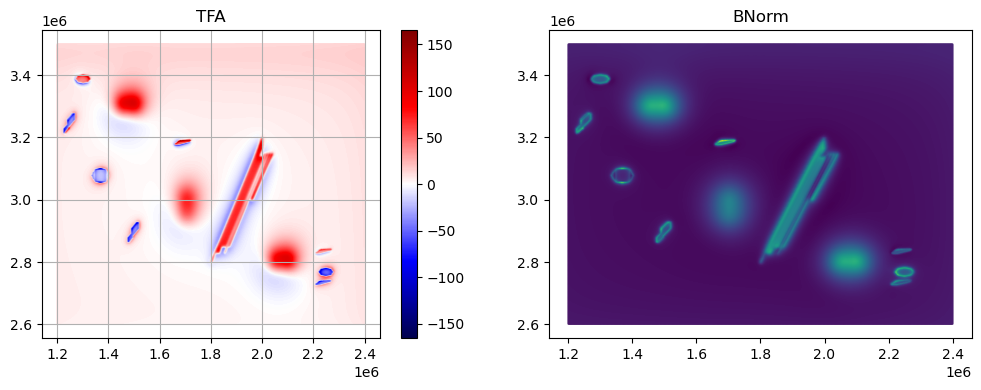

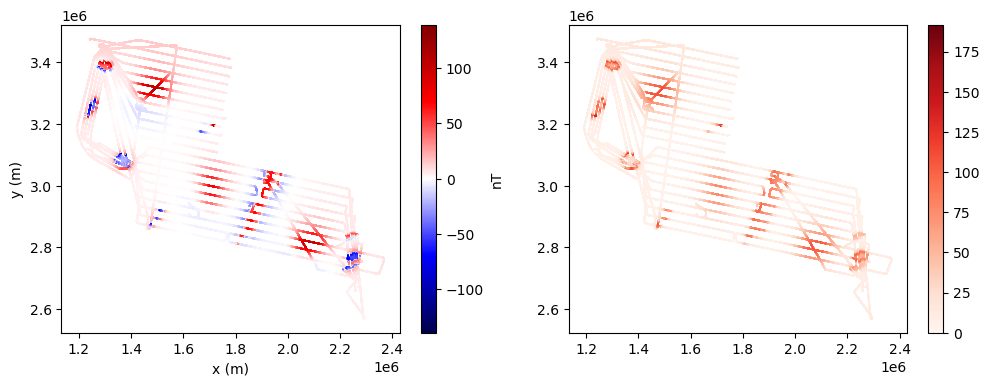

In [83]:
plt.figure(figsize=(12,4))
scale = vd.maxabs(tfa01)
plt.subplot(1,2,1)
plt.scatter(*grid_coords01[:2], c=tfa01, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.grid()
plt.colorbar()
plt.title("TFA")
scale_bnorm = vd.maxabs(bnorm01)
plt.subplot(1,2,2)
plt.scatter(*grid_coords01[:2], c=bnorm01, cmap="viridis",s=0.01, vmin=0, vmax=scale_bnorm)
plt.title("BNorm")
plt.show()

plt.figure(figsize=(12,4))
scale = vd.maxabs(tfa)
plt.subplot(1,2,1)
plt.scatter(*coordinates[:2], c=tfa, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.colorbar(label="nT")
scale_bnorm = vd.maxabs(bnorm)
plt.subplot(1,2,2)
plt.scatter(*coordinates[:2], c=bnorm, cmap="Reds",s=0.01, vmin=0, vmax=scale_bnorm)
plt.colorbar()
plt.show()